<img align="center" src="figures/course.png" width="800">

#                                    16720 (B) Neural Networks for Recognition - Assignment 3

     Instructor: Kris Kitani                       TAs: Qichen(Lead), Paritosh, Rawal, Yan, Zen, Wen-Hsuan

## Q7 PyTorch (40 points)

**Please include all the write up answers below to theory.ipynb. For the questions need code, you need to include the screenshot of code to theory.ipynb to get points.**

While you were able to derive manual back-propagation rules for sigmoid and fully-connected layers, wouldn't it be nice if someone did that for lots of useful primatives and made it fast and easy to use for general computation?  Meet [automatic differentiation](https://en.wikipedia.org/wiki/Automatic_differentiation). Since we have high-dimensional inputs (images) and low-dimensional outputs (a scalar loss), it turns out **forward mode AD** is very efficient. Popular autodiff packages include [pytorch](https://pytorch.org/) (Facebook), [tensorflow](https://www.tensorflow.org/) (Google), [autograd](https://github.com/HIPS/autograd) (Boston-area academics). Autograd provides its own replacement for numpy operators and is a drop-in replacement for numpy, except you can ask for gradients now. The other two are able to act as shim layers for [cuDNN](https://developer.nvidia.com/cudnn), an implementation of auto-diff made by Nvidia for use on their GPUs. Since GPUs are able to perform large amounts of math much faster than CPUs, this makes the former two packages very popular for researchers who train large networks. Tensorflow asks you to build a computational graph using its API, and then is able to pass data through that graph. PyTorch builds a dynamic graph and allows you to mix autograd functions with normal python code much more smoothly, so it is currently more popular among CMU students. 

We will use [pytorch](https://pytorch.org/) as a framework. Many computer vision projects use neural networks as a basic building block, so familiarity with one of these frameworks is a good skill to develop. Here, we basically replicate and slightly expand our handwritten character recognition networks, but do it in PyTorch instead of doing it ourselves. Feel free to use any tutorial you like, but we like [the offical one](https://pytorch.org/tutorials/beginner/deep_learning_60min_blitz.html) or [this tutorial](http://cs231n.stanford.edu/notebooks/pytorch_tutorial.ipynb) (in a jupyter notebook) or [these slides](http://cs231n.stanford.edu/slides/2018/cs231n_2018_lecture08.pdf (starting from number 35).

**For this section, you're free to implement these however you like. All of the tasks required here are fairly small and don't require a GPU if you use small networks. Including 7.2.**

### Q7.1 Train a neural network in PyTorch

#### Q7.1.1 (10 Points Code+WriteUp)
 
Re-write and re-train your fully-connected network on NIST36 in PyTorch. Plot training accuracy and loss over time.

<font color="red">**Please include the write up answer and the screenshot of code to theory.ipynb**</font>

In [328]:
import numpy as np
import scipy.io
from ipynb.fs.defs.q2 import *
import torch
import torchvision.datasets
from torch.utils.data import TensorDataset, DataLoader
import matplotlib.pyplot as plt


torch.manual_seed(123)
device = torch.device("cpu")
print("device = {}".format(device))

print("Get dataset")
train_data = scipy.io.loadmat('data/nist36_train.mat')
valid_data = scipy.io.loadmat('data/nist36_valid.mat')

train_x, train_y = train_data['train_data'].astype(np.float32), train_data['train_labels'].astype(np.int)
valid_x, valid_y = valid_data['valid_data'].astype(np.float32), valid_data['valid_labels'].astype(np.int)

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        
        self.fc1 = nn.Linear(1024, 64)
        self.fc2 = nn.Linear(64, 36)
        
    def forward(self, x):
        x = F.sigmoid(self.fc1(x))
        x = self.fc2(x)
        return x
        

model = Net()
optimizer = optim.SGD(model.parameters(), lr=0.025, momentum=0.9)

givendata_train = TensorDataset(torch.from_numpy(train_x), torch.from_numpy(train_y))
givendata_test = TensorDataset(torch.from_numpy(valid_x), torch.from_numpy(valid_y))
trainset_loader = DataLoader(givendata_train, batch_size=64, shuffle=True, num_workers=1)
validset_loader = DataLoader(givendata_test, batch_size=64, shuffle=True, num_workers=1)


def train(max_iters):
    model.train()
    Taccuracies = []
    Tlosses = []
    for itr in range(max_iters):
        correct = 0
        Tloss = 0
        num = 0
        for batch_idx, (data, target) in enumerate(trainset_loader):
            data, target = data.to(device), target.to(device)
            output = model(data)
            target = torch.max(target, 1)[1]
            loss = nn.functional.cross_entropy(output, target)            
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()
            Tloss = Tloss + loss.item()

            pred = torch.max(output, 1)[1] 
            correct += pred.eq(target).sum().item()
            num = num + 1
        
        Taccuracies.append(100. * correct / (num*64))
        Tlosses.append(Tloss/num)
        if itr % 2 == 0:
            print('Accuracy {:.2f} %'.format(100. * correct / (num*64)))
            print('Loss: {:.6f}'.format(Tloss/num))
            
    return Taccuracies, Tlosses

device = cpu
Get dataset


In [329]:
Taccuracies, Tlosses = train(120)

Accuracy 8.65 %
Loss: 3.475286
Accuracy 51.01 %
Loss: 2.060451
Accuracy 62.59 %
Loss: 1.424384
Accuracy 67.56 %
Loss: 1.201018
Accuracy 70.76 %
Loss: 1.073076
Accuracy 72.85 %
Loss: 0.985812
Accuracy 74.86 %
Loss: 0.904878
Accuracy 76.16 %
Loss: 0.853578
Accuracy 77.93 %
Loss: 0.810443
Accuracy 78.94 %
Loss: 0.758519
Accuracy 79.83 %
Loss: 0.724885
Accuracy 80.92 %
Loss: 0.686482
Accuracy 81.59 %
Loss: 0.663256
Accuracy 83.09 %
Loss: 0.620473
Accuracy 83.27 %
Loss: 0.602514
Accuracy 83.79 %
Loss: 0.572753
Accuracy 84.65 %
Loss: 0.551706
Accuracy 85.30 %
Loss: 0.525041
Accuracy 85.69 %
Loss: 0.515359
Accuracy 86.25 %
Loss: 0.486746
Accuracy 86.73 %
Loss: 0.472264
Accuracy 87.19 %
Loss: 0.452520
Accuracy 88.15 %
Loss: 0.433255
Accuracy 88.45 %
Loss: 0.420768
Accuracy 88.60 %
Loss: 0.410055
Accuracy 89.12 %
Loss: 0.392081
Accuracy 89.27 %
Loss: 0.382212
Accuracy 90.06 %
Loss: 0.367700
Accuracy 90.50 %
Loss: 0.353645
Accuracy 90.33 %
Loss: 0.350079
Accuracy 91.21 %
Loss: 0.334938
Accuracy 

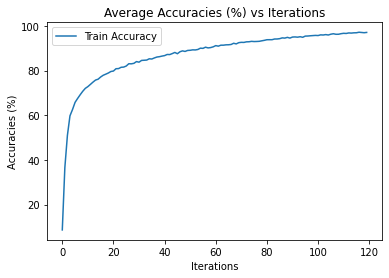

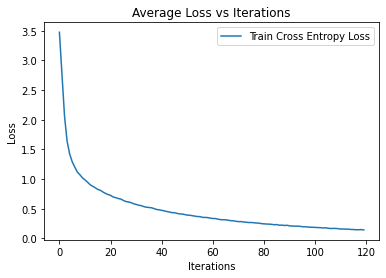

In [330]:
import matplotlib.pyplot as plt

plt.figure()
plt.plot(np.arange(120), [i for i in Taccuracies], label = "Train Accuracy")
plt.xlabel("Iterations")
plt.ylabel("Accuracies (%)")
plt.legend(loc="best")
plt.title("Average Accuracies (%) vs Iterations")
plt.show()

plt.figure()
plt.plot(np.arange(120), [i for i in Tlosses], label = "Train Cross Entropy Loss")
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.legend(loc="best")
plt.title("Average Loss vs Iterations")
plt.show()

In [332]:
# Vaccuracies = []
# Vloss = []
model.eval()  # set evaluation mode
valid_loss = 0
correct = 0
with torch.no_grad():
    for data, target in validset_loader:
        data, target = data.to(device), target.to(device)
        output = model(data)
        target = torch.max(target, 1)[1]
        valid_loss += nn.functional.cross_entropy(output, target)
        # Vloss.append(valid_loss)
        pred = torch.max(output, 1)[1] 
        correct += pred.eq(target).sum().item()
        # Vaccuracies.append(

valid_loss /= len(validset_loader.dataset)
print('\nValid set: Average loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
    valid_loss, correct, len(validset_loader.dataset),
    100. * correct / len(validset_loader.dataset)))


Test set: Average loss: 0.0117, Accuracy: 2849/3600 (79%)



In [ ]:
test_data = scipy.io.loadmat('data/nist36_test.mat')
test_x, test_y = test_data['test_data'].astype(np.float32), test_data['test_labels'].astype(np.int)
givendata_test = TensorDataset(torch.from_numpy(test_x), torch.from_numpy(test_y))
testset_loader = DataLoader(givendata_test, batch_size=64, shuffle=True, num_workers=1)
# Vaccuracies = []
# Vloss = []
model.eval()  # set evaluation mode
test_loss = 0
correct = 0
with torch.no_grad():
    for data, target in testset_loader:
        data, target = data.to(device), target.to(device)
        output = model(data)
        target = torch.max(target, 1)[1]
        valid_loss += nn.functional.cross_entropy(output, target)
        # Vloss.append(valid_loss)
        pred = torch.max(output, 1)[1] 
        correct += pred.eq(target).sum().item()
        # Vaccuracies.append(

test_loss /= len(testset_loader.dataset)
print('\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
    test_loss, correct, len(testset_loader.dataset),
    100. * correct / len(testset_loader.dataset)))

#### Q7.1.2 (3 Points Code+WriteUp)
 
Train a convolutional neural network with PyTorch on MNIST. Plot training accuracy and loss over time.

<font color="red">**Please include the write up answer and the screenshot of code to theory.ipynb**</font>

In [430]:
import numpy as np
import scipy.io
import torch
import torchvision
from torch import nn, optim
import torch.nn.functional as F  # a lower level (compared to torch.nn) interface
from torch.utils.data import Dataset, DataLoader
from torchvision.datasets import MNIST
import torchvision.transforms as transforms
from time import time

# Use GPU if available, otherwise stick with cpu
use_cuda = torch.cuda.is_available()
torch.manual_seed(123)
device = torch.device("cpu")
print("device = {}".format(device))

print("Get dataset")
mnist_train = MNIST(root="data", train=True, download=True, transform=transforms.ToTensor())
trainset_loader = DataLoader(mnist_train, batch_size=20, shuffle=True, num_workers=1)

mnist_test = MNIST(root="data", train=False, download=True, transform=transforms.ToTensor())
testset_loader = DataLoader(mnist_test, batch_size=20, shuffle=True, num_workers=1)

print("dataset size train, test")
print(trainset_loader.dataset.data.shape)
print(testset_loader.dataset.data.shape)

print(trainset_loader.dataset)
print(testset_loader.dataset)


# YOUR CODE HERE
# raise NotImplementedError()

device = cpu
Get dataset
dataset size train, test
torch.Size([60000, 28, 28])
torch.Size([10000, 28, 28])
Dataset MNIST
    Number of datapoints: 60000
    Root location: data
    Split: Train
    StandardTransform
Transform: ToTensor()
Dataset MNIST
    Number of datapoints: 10000
    Root location: data
    Split: Test
    StandardTransform
Transform: ToTensor()


In [431]:
class ConvNet(nn.Module):
    def __init__(self):
        super(ConvNet, self).__init__()

        self.conv1 = nn.Conv2d(1, 4, kernel_size=5, stride = 1, padding = 2)
        self.conv2 = nn.Conv2d(4, 8, kernel_size=5, stride = 1, padding = 2)
        self.conv2_drop = nn.Dropout2d()
        
        self.fc1 = nn.Linear(8 * 7 * 7, 150)
        self.fc2 = nn.Linear(150, 10)
        
        self.max_pool = nn.MaxPool2d(2)
        # ReLU(inplace=False)
        self.relu = nn.ReLU()

    def forward(self, x):
        x = F.max_pool2d(F.relu(self.conv1(x)), 2)
        # x = F.max_pool2d(F.relu(self.conv2(x)), 2) #
        x = self.max_pool(self.relu(self.conv2_drop(self.conv2(x))))
        x = x.view(-1, 8 * 7 * 7)
        x = F.relu(self.fc1(x))
        # x = F.dropout(x, training=self.training)
        x = self.fc2(x)
        return F.log_softmax(x, dim=1)

model = ConvNet().to(device)
optimizer = optim.SGD(model.parameters(), lr=0.0004, momentum=0.9)

In [432]:
def train(epoch, log_interval=100):
    model.train()  # set training mode
    Taccuracies = []
    Tlosses = []
    for ep in range(epoch):
        correct = 0
        Tloss = 0
        num = 0
        for batch_idx, (data, target) in enumerate(trainset_loader):
            # bring data to the computing device, e.g. GPU
            data, target = data.to(device), target.to(device)
            # print(target.shape)
            # forward pass
            output = model(data)
            # compute loss: negative log-likelihood
            loss = F.nll_loss(output, target)
            
            # backward pass
            # clear the gradients of all tensors being optimized.
            
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()
            Tloss = Tloss + loss.item()

            pred = output.max(1, keepdim=True)[1] # get the index of the max log-probability
            correct += pred.eq(target.view_as(pred)).sum().item()
            num = num + 1
        
        print('Accuracy: {}/{} ({:.0f}%)'.format(correct, len(trainset_loader.dataset), 100. * correct / len(trainset_loader.dataset)))
        print('Loss: {:.6f}'.format(Tloss/num))
        Taccuracies.append(100. * correct / len(trainset_loader.dataset))
        Tlosses.append(Tloss/num)
        
    return Taccuracies, Tlosses
        
        # test() # evaluate at the end of epoch

In [433]:
Taccuracies, Tlosses = train(20)

Accuracy: 29471/60000 (49%)
Loss: 1.538721
Accuracy: 52889/60000 (88%)
Loss: 0.412216
Accuracy: 55074/60000 (92%)
Loss: 0.291196
Accuracy: 55946/60000 (93%)
Loss: 0.237769
Accuracy: 56557/60000 (94%)
Loss: 0.203680
Accuracy: 56890/60000 (95%)
Loss: 0.183542
Accuracy: 57132/60000 (95%)
Loss: 0.167392
Accuracy: 57349/60000 (96%)
Loss: 0.153204
Accuracy: 57472/60000 (96%)
Loss: 0.144901
Accuracy: 57653/60000 (96%)
Loss: 0.135991
Accuracy: 57761/60000 (96%)
Loss: 0.129951
Accuracy: 57875/60000 (96%)
Loss: 0.125254
Accuracy: 58008/60000 (97%)
Loss: 0.117894
Accuracy: 58036/60000 (97%)
Loss: 0.112368
Accuracy: 58119/60000 (97%)
Loss: 0.108477
Accuracy: 58105/60000 (97%)
Loss: 0.106399
Accuracy: 58210/60000 (97%)
Loss: 0.100601
Accuracy: 58213/60000 (97%)
Loss: 0.099762
Accuracy: 58270/60000 (97%)
Loss: 0.097195
Accuracy: 58316/60000 (97%)
Loss: 0.094604


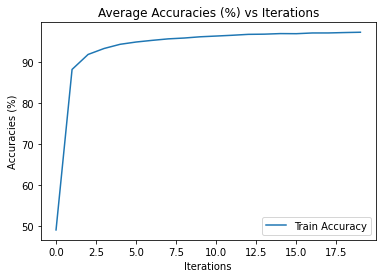

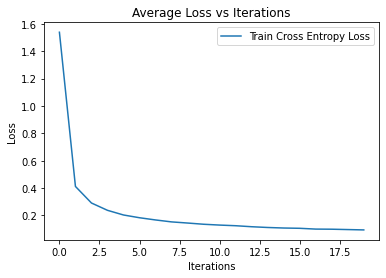

In [434]:
import matplotlib.pyplot as plt

plt.figure()
plt.plot(np.arange(20), [i for i in Taccuracies], label = "Train Accuracy")
plt.xlabel("Iterations")
plt.ylabel("Accuracies (%)")
plt.legend(loc="best")
plt.title("Average Accuracies (%) vs Iterations")
plt.show()

plt.figure()
plt.plot(np.arange(20), [i for i in Tlosses], label = "Train Cross Entropy Loss")
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.legend(loc="best")
plt.title("Average Loss vs Iterations")
plt.show()

In [436]:
model.eval()  # set evaluation mode
test_loss = 0
correct = 0
with torch.no_grad():
    for data, target in testset_loader:
        data, target = data.to(device), target.to(device)
        output = model(data)
        test_loss += F.nll_loss(output, target, size_average=False).item() 
        pred = output.max(1, keepdim=True)[1]
        correct += pred.eq(target.view_as(pred)).sum().item()

test_loss /= len(testset_loader.dataset)
print('\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.2f}%)\n'.format(
    test_loss, correct, len(testset_loader.dataset),
    100. * correct / len(testset_loader.dataset)))


Test set: Average loss: 0.0503, Accuracy: 9834/10000 (98.34%)



#### Q7.1.3 (2 Points Code+WriteUp)
 
Train a convolutional neural network with PyTorch on the included NIST36 dataset. Plot training accuracy and loss over time.

<font color="red">**Please include the write up answer and the screenshot of code to theory.ipynb**</font>

In [454]:
import numpy as np
import scipy.io
import torch
from torch import nn, optim
import torch.nn.functional as F  # a lower level (compared to torch.nn) interface
from torch.utils.data import Dataset, DataLoader
import torchvision
import torchvision.transforms as transforms
from time import time
import matplotlib.pyplot as plt

# Use GPU if available, otherwise stick with cpu
use_cuda = torch.cuda.is_available()
torch.manual_seed(123)
device = torch.device("cpu")
print("device = {}".format(device))

print("Get dataset")
train_data = scipy.io.loadmat('data/nist36_train.mat')
valid_data = scipy.io.loadmat('data/nist36_valid.mat')

train_x, train_y = train_data['train_data'].astype(np.float32), train_data['train_labels'].astype(np.int)
valid_x, valid_y = valid_data['valid_data'].astype(np.float32), valid_data['valid_labels'].astype(np.int)

# YOUR CODE HERE
# raise NotImplementedError()

device = cpu
Get dataset


In [455]:
class ConvNet(nn.Module):
    def __init__(self):
        super(ConvNet, self).__init__()
        
        # Conv2d(in_channels, out_channels, kernel_size, stride=1, padding=0,
        #        dilation=1, groups=1, bias=True, padding_mode='zeros')
        self.conv1 = nn.Conv2d(1, 16, kernel_size=5, stride = 1, padding = 2)
        self.conv2 = nn.Conv2d(16, 32, kernel_size=5, stride = 1, padding = 2)
        self.conv2_drop = nn.Dropout2d()
        
        # Linear(in_features, out_features, bias=True)
        self.fc1 = nn.Linear(32 * 8 * 8, 500)
        self.fc2 = nn.Linear(500, 36)
        
        # MaxPool2d(kernel_size, stride=None, padding=0, dilation=1, return_indices=False, ceil_mode=False)
        self.max_pool = nn.MaxPool2d(2)
        # ReLU(inplace=False)
        self.relu = nn.ReLU()

    def forward(self, x):
        # Note: the following two ways for max pooling / relu are equivalent.
        # 1) with torch.nn.functional:
        x = F.max_pool2d(F.relu(self.conv1(x)), 2)
        # 2) with torch.nn:
        x = F.max_pool2d(F.relu(self.conv2(x)), 2) #self.relu(self.max_pool(self.conv2_drop(self.conv2(x))))
        x = x.view(-1, 32 * 8 * 8)
        x = F.relu(self.fc1(x))
        x = F.dropout(x, training=self.training)
        x = self.fc2(x)
        return x

model1 = ConvNet().to(device)
optimizer = optim.SGD(model1.parameters(), lr=0.001, momentum=0.9)

In [456]:
givendata_train = TensorDataset(torch.from_numpy(train_x.reshape(train_x.shape[0], 1, 32, 32)), torch.from_numpy(train_y))
givendata_test = TensorDataset(torch.from_numpy(valid_x.reshape(valid_x.shape[0], 1, 32, 32)), torch.from_numpy(valid_y))
trainset_loader = DataLoader(givendata_train, batch_size=64, shuffle=True, num_workers=1)
validset_loader = DataLoader(givendata_test, batch_size=64, shuffle=True, num_workers=1)


def train(max_iters):
    model1.train()
    Taccuracies = []
    Tlosses = []
    for itr in range(max_iters):
        correct = 0
        Tloss = 0
        num = 0
        for batch_idx, (data, target) in enumerate(trainset_loader):
            data, target = data.to(device), target.to(device)
            # print(data.size())
            # forward pass
            output = model1(data)
            # print(output.size())
            # print(target.size())
            target = torch.max(target, 1)[1]
            loss = nn.functional.cross_entropy(output, target)
            
            # backward pass
            # clear the gradients of all tensors being optimized.
            
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()
            Tloss = Tloss + loss.item()

            pred = torch.max(output, 1)[1] # get the index of the max log-probability
            correct += pred.eq(target).sum().item()
            num = num + 1
            
            # print(len(trainset_loader.dataset))
        
        Taccuracies.append(100. * correct / (num*64))
        Tlosses.append(Tloss/num)
        if itr % 2 == 0:
            print('Accuracy {:.2f} %'.format(100. * correct / (num*64)))
            print('Loss: {:.6f}'.format(Tloss/num))
            
    return Taccuracies, Tlosses

In [457]:
Taccuracies, Tlosses = train(60)

Accuracy 3.25 %
Loss: 3.581832
Accuracy 8.65 %
Loss: 3.551577
Accuracy 21.50 %
Loss: 3.287986
Accuracy 49.22 %
Loss: 1.785873
Accuracy 65.51 %
Loss: 1.189467
Accuracy 72.45 %
Loss: 0.938052
Accuracy 77.36 %
Loss: 0.760565
Accuracy 80.12 %
Loss: 0.655760
Accuracy 82.79 %
Loss: 0.569822
Accuracy 84.62 %
Loss: 0.506652
Accuracy 86.26 %
Loss: 0.446586
Accuracy 87.39 %
Loss: 0.402615
Accuracy 87.61 %
Loss: 0.383569
Accuracy 89.33 %
Loss: 0.342255
Accuracy 89.53 %
Loss: 0.327018
Accuracy 90.18 %
Loss: 0.298872
Accuracy 90.85 %
Loss: 0.284025
Accuracy 91.38 %
Loss: 0.263793
Accuracy 91.86 %
Loss: 0.241209
Accuracy 91.85 %
Loss: 0.241078
Accuracy 92.51 %
Loss: 0.222159
Accuracy 92.87 %
Loss: 0.213751
Accuracy 93.56 %
Loss: 0.199325
Accuracy 93.01 %
Loss: 0.200921
Accuracy 93.91 %
Loss: 0.180988
Accuracy 94.02 %
Loss: 0.176183
Accuracy 93.99 %
Loss: 0.169257
Accuracy 94.39 %
Loss: 0.159001
Accuracy 94.87 %
Loss: 0.150030
Accuracy 94.74 %
Loss: 0.146743


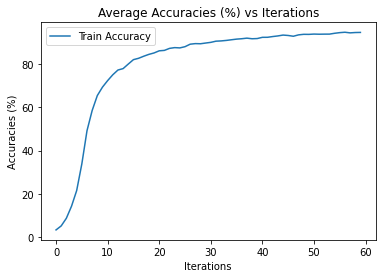

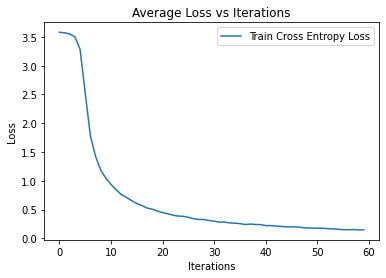

In [459]:
import matplotlib.pyplot as plt

plt.figure()
plt.plot(np.arange(60), [i for i in Taccuracies], label = "Train Accuracy")
plt.xlabel("Iterations")
plt.ylabel("Accuracies (%)")
plt.legend(loc="best")
plt.title("Average Accuracies (%) vs Iterations")
plt.show()

plt.figure()
plt.plot(np.arange(60), [i for i in Tlosses], label = "Train Cross Entropy Loss")
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.legend(loc="best")
plt.title("Average Loss vs Iterations")
plt.show()

In [462]:
# Vaccuracies = []
# Vloss = []
model1.eval()  # set evaluation mode
valid_loss = 0
correct = 0
with torch.no_grad():
    for data, target in validset_loader:
        data, target = data.to(device), target.to(device)
        output = model1(data)
        target = torch.max(target, 1)[1]
        valid_loss += nn.functional.cross_entropy(output, target)
        # Vloss.append(valid_loss)
        pred = torch.max(output, 1)[1] 
        correct += pred.eq(target).sum().item()
        # Vaccuracies.append(

valid_loss /= len(validset_loader.dataset)
print('\nValidation set: Average loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
    valid_loss, correct, len(validset_loader.dataset),
    100. * correct / len(validset_loader.dataset)))


Validation set: Average loss: 0.0043, Accuracy: 3290/3600 (91%)



In [ ]:
test_data = scipy.io.loadmat('data/nist36_test.mat')
test_x, test_y = test_data['test_data'].astype(np.float32), test_data['test_labels'].astype(np.int)
givendata_test = TensorDataset(torch.from_numpy(test_x.reshape(test_x.shape[0], 1, 32, 32)), torch.from_numpy(test_y))

# givendata_test = TensorDataset(torch.from_numpy(test_x), torch.from_numpy(test_y))
testset_loader = DataLoader(givendata_test, batch_size=64, shuffle=True, num_workers=1)
# Vaccuracies = []
# Vloss = []
model1.eval()  # set evaluation mode
test_loss = 0
correct = 0
with torch.no_grad():
    for data, target in testset_loader:
        data, target = data.to(device), target.to(device)
        output = model1(data)
        target = torch.max(target, 1)[1]
        valid_loss += nn.functional.cross_entropy(output, target)
        # Vloss.append(valid_loss)
        pred = torch.max(output, 1)[1] 
        correct += pred.eq(target).sum().item()
        # Vaccuracies.append(

test_loss /= len(testset_loader.dataset)
print('\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
    test_loss, correct, len(testset_loader.dataset),
    100. * correct / len(testset_loader.dataset)))

#### Q7.1.4 (15 Points Code+WriteUp)
 
Train a convolutional neural network with PyTorch on the EMNIST Balanced dataset  (available in *torchvision.datasets*, use *balanced* split) and evaluate it on the findLetters bounded boxes from the images folder. Find the accuracy on these bounded boxes.

<font color="red">**Please include the write up answer and the screenshot of code to theory.ipynb**</font>

In [497]:
import numpy as np
import scipy.io
import torch
from torch import nn, optim
import torchvision
import torch.nn.functional as F  # a lower level (compared to torch.nn) interface
from torch.utils.data import Dataset, DataLoader
from torchvision.datasets import EMNIST
import torchvision.transforms as transforms
from time import time

# Use GPU if available, otherwise stick with cpu
use_cuda = torch.cuda.is_available()
torch.manual_seed(123)
device = torch.device("cpu")
print("device = {}".format(device))

print("Get dataset")

EMNIST.url = 'http://www.itl.nist.gov/iaui/vip/cs_links/EMNIST/gzip.zip'
# Reference for transform function
# https://stackoverflow.com/a/54513835
transform=torchvision.transforms.Compose([
    lambda img: torchvision.transforms.functional.rotate(img, -90),
    lambda img: torchvision.transforms.functional.hflip(img),
    torchvision.transforms.ToTensor()
])
emnist_train = EMNIST(root="data", split='balanced', train=True, download=True, transform=transform)
trainset_loader = DataLoader(emnist_train, batch_size=20, shuffle=True, num_workers=0)

emnist_test = EMNIST(root="data", split='balanced', train=False, download=True, transform=transform)
testset_loader = DataLoader(emnist_test, batch_size=20, shuffle=True, num_workers=0)

# Ref: https://github.com/gaurav0651/emnist/blob/master/train_emnist.ipynb
label_map = ['0','1','2','3','4','5','6','7','8','9',
       'A','B','C','D','E','F','G','H','I','J','K','L','M','N','O','P','Q','R','S','T','U','V','W','X','Y','Z',
       'a','b','d','e','f','g','h','n','q','r','t']

print(trainset_loader.dataset.data.shape)
print(testset_loader.dataset.data.shape)

# YOUR CODE HERE
# raise NotImplementedError()

device = cpu
Get dataset
torch.Size([112800, 28, 28])
torch.Size([18800, 28, 28])


In [499]:
class ConvNet(nn.Module):
    def __init__(self):
        super(ConvNet, self).__init__()
        
        # Conv2d(in_channels, out_channe|ls, kernel_size, stride=1, padding=0,
        #        dilation=1, groups=1, bias=True, padding_mode='zeros')
        self.conv1 = nn.Conv2d(1, 16, kernel_size=5, stride = 1, padding = 2)
        self.conv2 = nn.Conv2d(16, 32, kernel_size=5, stride = 1, padding = 2)
        self.conv2_drop = nn.Dropout2d()
        
        # Linear(in_features, out_features, bias=True)
        self.fc1 = nn.Linear(32 * 7 * 7, 500)
        self.fc2 = nn.Linear(500, 47)
        
        # MaxPool2d(kernel_size, stride=None, padding=0, dilation=1, return_indices=False, ceil_mode=False)
        self.max_pool = nn.MaxPool2d(2)
        # ReLU(inplace=False)
        self.relu = nn.ReLU()

    def forward(self, x):
        # Note: the following two ways for max pooling / relu are equivalent.
        # 1) with torch.nn.functional:
        x = F.max_pool2d(F.relu(self.conv1(x)), 2)
        # 2) with torch.nn:
        x = F.max_pool2d(F.relu(self.conv2(x)), 2) #self.relu(self.max_pool(self.conv2_drop(self.conv2(x))))
        x = x.view(-1, 32 * 7 * 7)
        x = F.relu(self.fc1(x))
        x = F.dropout(x, training=self.training)
        x = self.fc2(x)
        return F.log_softmax(x, dim=1)

model = ConvNet().to(device)
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)

In [500]:
def train(epoch, log_interval=100):
    model.train()  # set training mode
    Taccuracies = []
    Tlosses = []
    for ep in range(epoch):
        correct = 0
        Tloss = 0
        num = 1
        for batch_idx, (data, target) in enumerate(trainset_loader):
            # bring data to the computing device, e.g. GPU
            data, target = data.to(device), target.to(device)
            # print(target.shape)
            # forward pass
            output = model(data)
            # compute loss: negative log-likelihood
            loss = F.nll_loss(output, target)
            
            # backward pass
            # clear the gradients of all tensors being optimized.
            
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()
            Tloss = Tloss + loss.item()

            pred = output.max(1, keepdim=True)[1] # get the index of the max log-probability
            correct += pred.eq(target.view_as(pred)).sum().item()
            num = num + 1
        
        print('Accuracy: {}/{} ({:.0f}%)'.format(correct, len(trainset_loader.dataset), 100. * correct / len(trainset_loader.dataset)))
        print('Loss: {:.6f}'.format(Tloss/num))
        Taccuracies.append(100. * correct / len(trainset_loader.dataset))
        Tlosses.append(Tloss/num)
        # test() # evaluate at the end of epoch

In [501]:
Taccuracies, Tlosses = train(20)

Accuracy: 65804/112800 (58%)
Loss: 1.451900
Accuracy: 89100/112800 (79%)
Loss: 0.633955
Accuracy: 92617/112800 (82%)
Loss: 0.530376
Accuracy: 94183/112800 (83%)
Loss: 0.476860
Accuracy: 95492/112800 (85%)
Loss: 0.444680
Accuracy: 96263/112800 (85%)
Loss: 0.418012
Accuracy: 96915/112800 (86%)
Loss: 0.397987
Accuracy: 97472/112800 (86%)
Loss: 0.380712
Accuracy: 97948/112800 (87%)
Loss: 0.368232
Accuracy: 98314/112800 (87%)
Loss: 0.354823
Accuracy: 98588/112800 (87%)
Loss: 0.346746
Accuracy: 98849/112800 (88%)
Loss: 0.338124
Accuracy: 99279/112800 (88%)
Loss: 0.328914
Accuracy: 99471/112800 (88%)
Loss: 0.320197
Accuracy: 99779/112800 (88%)
Loss: 0.311226
Accuracy: 99912/112800 (89%)
Loss: 0.306138
Accuracy: 100218/112800 (89%)
Loss: 0.296977
Accuracy: 100432/112800 (89%)
Loss: 0.292087
Accuracy: 100614/112800 (89%)
Loss: 0.286088
Accuracy: 100843/112800 (89%)
Loss: 0.282625


TypeError: cannot unpack non-iterable NoneType object

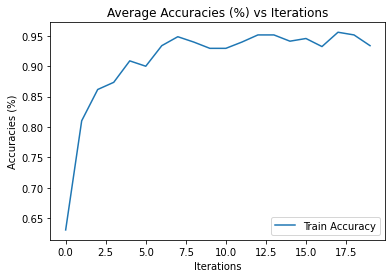

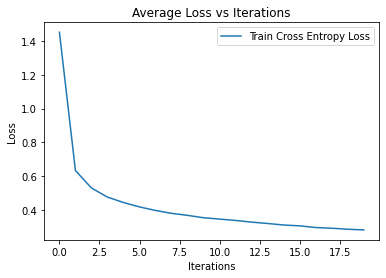

In [514]:
import matplotlib.pyplot as plt

plt.figure()
plt.plot(np.arange(20), [i for i in Taccuracies], label = "Train Accuracy")
plt.xlabel("Iterations")
plt.ylabel("Accuracies (%)")
plt.legend(loc="best")
plt.title("Average Accuracies (%) vs Iterations")
plt.show()

plt.figure()
Drr = [1.451, 0.633, 0.530, 0.476, 0.444, 0.418, 0.397, 0.380, 0.368, 0.354, 0.346, 0.338, 0.328, 0.320, 0.311, 0.306, 0.296, 0.292, 0.286, 0.282]
plt.plot(np.arange(20), Drr, label = "Train Cross Entropy Loss")
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.legend(loc="best")
plt.title("Average Loss vs Iterations")
plt.show()

In [503]:
model.eval()  # set evaluation mode
test_loss = 0
correct = 0
with torch.no_grad():
    for data, target in testset_loader:
        data, target = data.to(device), target.to(device)
        output = model(data)
        test_loss += F.nll_loss(output, target, size_average=False).item() 
        pred = output.max(1, keepdim=True)[1]
        correct += pred.eq(target.view_as(pred)).sum().item()

test_loss /= len(testset_loader.dataset)
print('\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.2f}%)\n'.format(
    test_loss, correct, len(testset_loader.dataset),
    100. * correct / len(testset_loader.dataset)))

C:\Users\saisi\AppData\Local\Programs\Python\Python37\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))



Test set: Average loss: 0.3293, Accuracy: 16650/18800 (88.56%)



In [504]:
import pickle
with open('processed_images.pickle', 'rb') as handle:
    processed_images = pickle.load(handle)

In [515]:
import matplotlib.pyplot as plt
import skimage.transform
inputn1 = np.ones((len(processed_images['image0']), 28, 28))
for i in range(len(processed_images['image0'])):
    inputn = processed_images['image0'][i].reshape(32,32).T
    inputn = skimage.transform.resize(inputn*255, (28, 28))
    inputn = (inputn - np.min(inputn))/(np.max(inputn) - np.min(inputn))
    inputn = (1 - inputn) * 255
    inputn1[i, :, :] = inputn
print(inputn1.shape)
inputn1 = torch.from_numpy(inputn1)
inputn1 = inputn1.unsqueeze(1)
outputn1 = model(inputn1.float())
preds = outputn1.max(1, keepdim=True)[1]
print(preds.size())
output = ""
for i in range(len(processed_images['image0'])):
    output = output + label_map[preds[i,0]]
groundtruth1 = "TODOLIST1MAKEATODOLIST2CHECKOFFTHEFIRSTTHINGONTODOLIST3REALIZEYOUHAVEALREADYCOMPLETED2THINGS4REWARDYOURSELFWITHANAP"
correct = 0
for x, y in zip(groundtruth1, output):
    if x == y:
        correct = correct + 1

accuracy1 = correct*100/len(output)
print("Accuarcy", accuracy1, "%")
print(output)
print(groundtruth1)

(115, 28, 28)
torch.Size([115, 1])
Accuarcy 83.47826086956522 %
T0DOLIST1MhKEhTOPOLZST2CHECKOFFTHEFIRSrTHINGONrODOLfST3RBhLIZEYOUHhVEhLREADYCOnPLErrD2THtNgS4REWhRDYOURSELFWIrHANAP
TODOLIST1MAKEATODOLIST2CHECKOFFTHEFIRSTTHINGONTODOLIST3REALIZEYOUHAVEALREADYCOMPLETED2THINGS4REWARDYOURSELFWITHANAP


In [517]:
inputn1 = np.ones((len(processed_images['image1']), 28, 28))
for i in range(len(processed_images['image1'])):
    inputn = processed_images['image1'][i].reshape(32,32).T
    inputn = skimage.transform.resize(inputn*255, (28, 28))
    inputn = (inputn - np.min(inputn))/(np.max(inputn) - np.min(inputn))
    inputn = (1 - inputn) * 255
    inputn1[i, :, :] = inputn
print(inputn1.shape)
inputn1 = torch.from_numpy(inputn1)
inputn1 = inputn1.unsqueeze(1)
outputn1 = model(inputn1.float())
preds = outputn1.max(1, keepdim=True)[1]
print(preds.size())
output = ""
for i in range(len(processed_images['image1'])):
    output = output + label_map[preds[i,0]]
groundtruth1 = "ABCDEFGHIJKLMNOPQRSTUVWXYZ1234567890"
correct = 0
for x, y in zip(groundtruth1, output):
    if x == y:
        correct = correct + 1

accuracy1 = correct*100/len(output)
print("Accuarcy", accuracy1, "%")
print(output)
print(groundtruth1)

(36, 28, 28)
torch.Size([36, 1])
Accuarcy 94.44444444444444 %
ABCDEFGHIJKLMN0PQRSTUVWXYZ12345678g0
ABCDEFGHIJKLMNOPQRSTUVWXYZ1234567890


In [518]:
inputn1 = np.ones((len(processed_images['image2']), 28, 28))
for i in range(len(processed_images['image2'])):
    inputn = processed_images['image2'][i].reshape(32,32).T
    inputn = skimage.transform.resize(inputn*255, (28, 28))
    inputn = (inputn - np.min(inputn))/(np.max(inputn) - np.min(inputn))
    inputn = (1 - inputn) * 255
    inputn1[i, :, :] = inputn
print(inputn1.shape)
inputn1 = torch.from_numpy(inputn1)
inputn1 = inputn1.unsqueeze(1)
outputn1 = model(inputn1.float())
preds = outputn1.max(1, keepdim=True)[1]
print(preds.size())
output = ""
for i in range(len(processed_images['image2'])):
    output = output + label_map[preds[i,0]]
groundtruth1 = "HAIKUSAREEASYBUTSOMETIMESTHEYDONTMAKESENSEREFRIGERATOR"
correct = 0
for x, y in zip(groundtruth1, output):
    if x == y:
        correct = correct + 1

accuracy1 = correct*100/len(output)
print("Accuarcy", accuracy1, "%")
print(output)
print(groundtruth1)

(54, 28, 28)
torch.Size([54, 1])
Accuarcy 94.44444444444444 %
HAIKUSAREEASrBUTSOMETIMESTHErDONTMAKESENSEREFRIGERAnOR
HAIKUSAREEASYBUTSOMETIMESTHEYDONTMAKESENSEREFRIGERATOR


In [519]:
inputn1 = np.ones((len(processed_images['image3']), 28, 28))
for i in range(len(processed_images['image3'])):
    inputn = processed_images['image3'][i].reshape(32,32).T
    inputn = skimage.transform.resize(inputn*255, (28, 28))
    inputn = (inputn - np.min(inputn))/(np.max(inputn) - np.min(inputn))
    inputn = (1 - inputn) * 255
    inputn1[i, :, :] = inputn
print(inputn1.shape)
inputn1 = torch.from_numpy(inputn1)
inputn1 = inputn1.unsqueeze(1)
outputn1 = model(inputn1.float())
preds = outputn1.max(1, keepdim=True)[1]
print(preds.size())
output = ""
for i in range(len(processed_images['image3'])):
    output = output + label_map[preds[i,0]]
groundtruth1 = "DEEPLEARNINGDEEPERLEARNINGDEEPESTLEARNING"
correct = 0
for x, y in zip(groundtruth1, output):
    if x == y:
        correct = correct + 1

accuracy1 = correct*100/len(output)
print("Accuarcy", accuracy1, "%")
print(output)
print(groundtruth1)

(41, 28, 28)
torch.Size([41, 1])
Accuarcy 97.5609756097561 %
DEEPLEARNINGDEEPERLEARNINGDEEPE5TLEARNING
DEEPLEARNINGDEEPERLEARNINGDEEPESTLEARNING


### Q7.2 Fine Tuning

#### Q7.2.1 (10 Points Code+WriteUp)
 
Fine-tune a single layer classifier using pytorch on the [flowers 17](http://www.robots.ox.ac.uk/~vgg/data/flowers/17/index.html) (or [flowers 102](http://www.robots.ox.ac.uk/~vgg/data/flowers/102/index.html)!) dataset using [squeezenet1\_1](https://pytorch.org/docs/stable/torchvision/models.html), as well as an architecture you've designed yourself (*3 conv layers, followed 2 fc layers, it's standard [slide 6](http://cs231n.stanford.edu/slides/2018/cs231n_2018_lecture09.pdf)*) and trained from scratch. How do they compare? 
    
We include a script in `scripts/` to fetch the flowers dataset and extract it in a way that [PyTorch ImageFolder](https://pytorch.org/docs/stable/torchvision/datasets.html#imagefolder) can consume it, see [an example](https://pytorch.org/tutorials/beginner/data_loading_tutorial.html#afterword-torchvision), from **data/oxford-flowers17**. You should look at how SqueezeNet is [defined](https://github.com/pytorch/vision/blob/master/torchvision/models/squeezenet.py), and just replace the classifier layer. There exists a pretty good example for [fine-tuning](https://gist.github.com/jcjohnson/6e41e8512c17eae5da50aebef3378a4c) in PyTorch.

<font color="red">**Please include the write up answer and the screenshot of code to theory.ipynb**</font>

In [484]:
# Code for fine-tune squeezenet1_1
# YOUR CODE HERE
from torchvision.datasets import ImageFolder
from torch.autograd import Variable

batch_size1 = 20
num_epochs = 20
def calculate_accuracy(model, loader):
    model.eval()
    num_correct, num_samples = 0, 0
    for x, y in loader:
        x_var = Variable(x, volatile=True) # .type(dtype)
        scores = model(x_var)
        _, preds = scores.data.cpu().max(1)
        num_correct += (preds == y).sum()
        num_samples += x.size(0)
        acc = float(num_correct) / num_samples
    return acc

def run_model(model, loss_fn, loader, optimizer):
    model.train()
    for x, y in loader:
        x_var = Variable(x.type(torch.FloatTensor))
        y_var = Variable(y.type(torch.FloatTensor).long())
        scores = model(x_var)
        loss = loss_fn(scores, y_var)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    return loss
    

mean = [0.485, 0.456, 0.406]
std = [0.229, 0.224, 0.225]
train_transform = transforms.Compose([transforms.Scale(256), transforms.RandomSizedCrop(224), transforms.RandomHorizontalFlip(), transforms.ToTensor(), transforms.Normalize(mean, std)])

train_dset = ImageFolder("./data/oxford-flowers17/train", transform=train_transform)
train_loader = DataLoader(train_dset, batch_size=batch_size1, num_workers=0, shuffle=True)

val_transform = transforms.Compose([transforms.Scale(224), transforms.CenterCrop(224), transforms.ToTensor(), transforms.Normalize(mean, std)])
val_dset = ImageFolder("./data/oxford-flowers17/val", transform=val_transform)
val_loader = DataLoader(val_dset, batch_size=batch_size1, num_workers=0)

lastmodel = torchvision.models.squeezenet1_1(pretrained=True)
num_classes = len(train_dset.classes)

lastmodel.classifier[1] = nn.Conv2d(512, num_classes, kernel_size=(1,1), stride=(1,1))
lastmodel.num_classes = num_classes

loss_fn = nn.CrossEntropyLoss()
for param in lastmodel.parameters():
    param.requires_grad = False
for param in lastmodel.classifier.parameters():
    param.requires_grad = True


optimizer = torch.optim.Adam(lastmodel.classifier.parameters(), lr=0.001)

Taccuracies = []
Vaccuracies = []
Tlosses = []
for epoch in range(num_epochs):
    # Run an epoch over the training data.
    print('Starting epoch %d' % (epoch + 1))
    loss = run_model(lastmodel, loss_fn, train_loader, optimizer)

    train_acc = calculate_accuracy(lastmodel, train_loader)
    val_acc = calculate_accuracy(lastmodel, val_loader)
    print('Train accuracy: ', train_acc)
    print('Val accuracy: ', val_acc)
    print()
    Taccuracies.append(train_acc)
    Vaccuracies.append(val_acc)
    Tlosses.append(loss)


Starting epoch 1


C:\Users\saisi\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:12: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  if sys.path[0] == '':


Train accuracy:  0.6558823529411765
Val accuracy:  0.6558823529411765

Starting epoch 2
Train accuracy:  0.8426470588235294
Val accuracy:  0.8735294117647059

Starting epoch 3
Train accuracy:  0.8838235294117647
Val accuracy:  0.9

Starting epoch 4
Train accuracy:  0.913235294117647
Val accuracy:  0.9147058823529411

Starting epoch 5
Train accuracy:  0.925
Val accuracy:  0.9205882352941176

Starting epoch 6
Train accuracy:  0.9426470588235294
Val accuracy:  0.9323529411764706

Starting epoch 7
Train accuracy:  0.9279411764705883
Val accuracy:  0.9411764705882353

Starting epoch 8
Train accuracy:  0.9294117647058824
Val accuracy:  0.9205882352941176

Starting epoch 9
Train accuracy:  0.95
Val accuracy:  0.9411764705882353

Starting epoch 10
Train accuracy:  0.9470588235294117
Val accuracy:  0.9470588235294117

Starting epoch 11
Train accuracy:  0.9529411764705882
Val accuracy:  0.95

Starting epoch 12
Train accuracy:  0.9426470588235294
Val accuracy:  0.9352941176470588

Starting epoch 

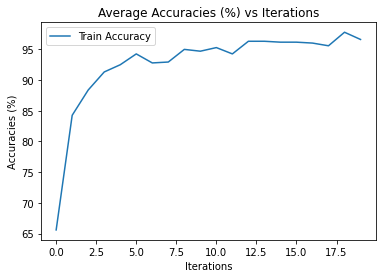

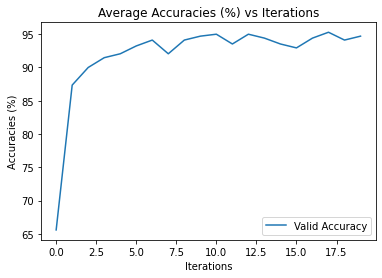

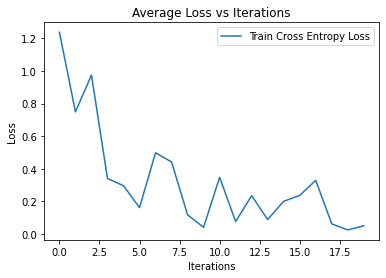

In [485]:
import matplotlib.pyplot as plt

plt.figure()
plt.plot(np.arange(20), [i*100 for i in Taccuracies], label = "Train Accuracy")
plt.xlabel("Iterations")
plt.ylabel("Accuracies (%)")
plt.legend(loc="best")
plt.title("Average Accuracies (%) vs Iterations")
plt.show()

plt.figure()
plt.plot(np.arange(20), [i*100 for i in Vaccuracies], label = "Valid Accuracy")
plt.xlabel("Iterations")
plt.ylabel("Accuracies (%)")
plt.legend(loc="best")
plt.title("Average Accuracies (%) vs Iterations")
plt.show()

plt.figure()
plt.plot(np.arange(20), [i for i in Tlosses], label = "Train Cross Entropy Loss")
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.legend(loc="best")
plt.title("Average Loss vs Iterations")
plt.show()

In [513]:
# Code for fine-tune squeezenet1_1
# YOUR CODE HERE
from torchvision.datasets import ImageFolder
from torch.autograd import Variable

batch_size1 = 40
num_epochs = 20
def calculate_accuracy(model, loader):
    model.eval()
    num_correct, num_samples = 0, 0
    for x, y in loader:
        x_var = Variable(x, volatile=True) # .type(dtype)
        scores = model(x_var)
        _, preds = scores.data.cpu().max(1)
        num_correct += (preds == y).sum()
        num_samples += x.size(0)
        acc = float(num_correct) / num_samples
    return acc

def run_model(model, loss_fn, loader, optimizer):
    model.train()
    for x, y in loader:
        x_var = Variable(x.type(torch.FloatTensor))
        y_var = Variable(y.type(torch.FloatTensor).long())
        scores = model(x_var)
        loss = loss_fn(scores, y_var)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    return loss
    

mean = [0.485, 0.456, 0.406]
std = [0.229, 0.224, 0.225]
train_transform = transforms.Compose([transforms.Scale(256), transforms.RandomSizedCrop(224), transforms.RandomHorizontalFlip(), transforms.ToTensor(), transforms.Normalize(mean, std)])

train_dset = ImageFolder("./data/oxford-flowers17/train", transform=train_transform)
train_loader = DataLoader(train_dset, batch_size=batch_size1, num_workers=0, shuffle=True)

val_transform = transforms.Compose([transforms.Scale(224), transforms.CenterCrop(224), transforms.ToTensor(), transforms.Normalize(mean, std)])
val_dset = ImageFolder("./data/oxford-flowers17/val", transform=val_transform)
val_loader = DataLoader(val_dset, batch_size=batch_size1, num_workers=0)

lastmodel = torchvision.models.squeezenet1_1(pretrained=True)
num_classes = len(train_dset.classes)
lastmodel.classifier[1] = nn.Conv2d(512, num_classes, kernel_size=(1,1), stride=(1,1))
lastmodel.num_classes = num_classes

loss_fn = nn.CrossEntropyLoss()
for param in lastmodel.parameters():
    param.requires_grad = False
for param in lastmodel.classifier.parameters():
    param.requires_grad = True


optimizer = torch.optim.Adam(lastmodel.classifier.parameters(), lr=0.009)

Taccuracies = []
Vaccuracies = []
Tlosses = []
for epoch in range(num_epochs):
    print('Starting epoch %d' % (epoch + 1))
    loss = run_model(lastmodel, loss_fn, train_loader, optimizer)

    train_acc = calculate_accuracy(lastmodel, train_loader)
    val_acc = calculate_accuracy(lastmodel, val_loader)
    print('Train accuracy: ', train_acc)
    print('Val accuracy: ', val_acc)
    print()
    Taccuracies.append(train_acc)
    Vaccuracies.append(val_acc)
    Tlosses.append(loss)

C:\Users\saisi\AppData\Local\Programs\Python\Python37\lib\site-packages\torchvision\transforms\transforms.py:279: UserWarning: The use of the transforms.Scale transform is deprecated, please use transforms.Resize instead.
  warnings.warn("The use of the transforms.Scale transform is deprecated, " +
C:\Users\saisi\AppData\Local\Programs\Python\Python37\lib\site-packages\torchvision\transforms\transforms.py:840: UserWarning: The use of the transforms.RandomSizedCrop transform is deprecated, please use transforms.RandomResizedCrop instead.
  warnings.warn("The use of the transforms.RandomSizedCrop transform is deprecated, " +


Starting epoch 1


C:\Users\saisi\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:12: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  if sys.path[0] == '':


Train accuracy:  0.6308823529411764
Val accuracy:  0.6323529411764706

Starting epoch 2
Train accuracy:  0.8102941176470588
Val accuracy:  0.8088235294117647

Starting epoch 3
Train accuracy:  0.861764705882353
Val accuracy:  0.8676470588235294

Starting epoch 4
Train accuracy:  0.8735294117647059
Val accuracy:  0.888235294117647

Starting epoch 5
Train accuracy:  0.9088235294117647
Val accuracy:  0.9058823529411765

Starting epoch 6
Train accuracy:  0.9
Val accuracy:  0.9088235294117647

Starting epoch 7
Train accuracy:  0.9338235294117647
Val accuracy:  0.9235294117647059

Starting epoch 8
Train accuracy:  0.9485294117647058
Val accuracy:  0.9294117647058824

Starting epoch 9
Train accuracy:  0.9397058823529412
Val accuracy:  0.9117647058823529

Starting epoch 10
Train accuracy:  0.9294117647058824
Val accuracy:  0.9382352941176471

Starting epoch 11
Train accuracy:  0.9294117647058824
Val accuracy:  0.9205882352941176

Starting epoch 12
Train accuracy:  0.9397058823529412
Val accura

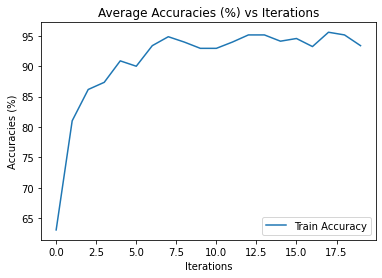

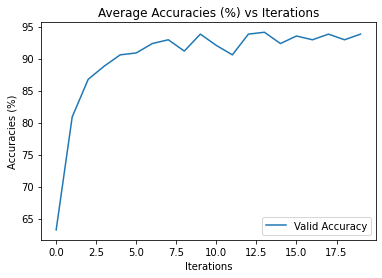

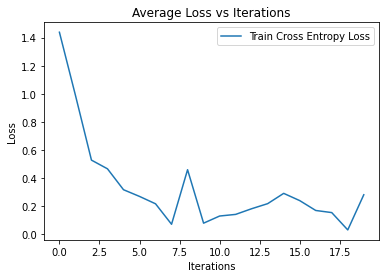

In [521]:
import matplotlib.pyplot as plt

plt.figure()
plt.plot(np.arange(20), [i*100 for i in Taccuracies], label = "Train Accuracy")
plt.xlabel("Iterations")
plt.ylabel("Accuracies (%)")
plt.legend(loc="best")
plt.title("Average Accuracies (%) vs Iterations")
plt.show()

plt.figure()
plt.plot(np.arange(20), [i*100 for i in Vaccuracies], label = "Valid Accuracy")
plt.xlabel("Iterations")
plt.ylabel("Accuracies (%)")
plt.legend(loc="best")
plt.title("Average Accuracies (%) vs Iterations")
plt.show()

plt.figure()
plt.plot(np.arange(20), [i for i in Tlosses], label = "Train Cross Entropy Loss")
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.legend(loc="best")
plt.title("Average Loss vs Iterations")
plt.show()

In [492]:
# Code for fine-tune the network you designed
# YOUR CODE HERE
class ConvNetF(nn.Module):
    def __init__(self):
        super(ConvNetF, self).__init__()
        
        self.conv1 = nn.Conv2d(3, 16, kernel_size=7, stride = 1, padding = 3)
        self.conv2 = nn.Conv2d(16, 64, kernel_size=5, stride = 1, padding = 2)
        self.conv3 = nn.Conv2d(64, 256, kernel_size=5, stride = 1, padding = 2)
        self.conv3_drop = nn.Dropout2d()
        
        self.fc1 = nn.Linear(256 * 28 * 28, 1000)
        self.fc2 = nn.Linear(1000, 17)
        
        self.max_pool = nn.MaxPool2d(2)
        self.relu = nn.ReLU()

    def forward(self, x):
        x = F.max_pool2d(F.relu(self.conv1(x)), 2)
        x = F.max_pool2d(F.relu(self.conv2(x)), 2) 
        x = self.max_pool(self.relu(self.conv3_drop(self.conv3(x))))
        x = x.view(-1, 256 * 28 * 28)
        x = F.relu(self.fc1(x))
        x = F.dropout(x, training=self.training)
        x = self.fc2(x)
        return x 

mymodel = ConvNetF().to(device)
optimizer = optim.SGD(mymodel.parameters(), lr=0.001, momentum=0.9)
# raise NotImplementedError()

In [494]:
def calculate_accuracy(model, loader):
    model.eval()
    num_correct, num_samples = 0, 0
    for x, y in loader:
        x_var = Variable(x, volatile=True) # .type(dtype)
        scores = model(x_var)
        preds = torch.max(scores, 1)[1]
        num_correct += (preds == y).sum()
        num_samples += x.size(0)
        acc = float(num_correct) / num_samples
    return acc

def run_model(model, loss_fn, loader, optimizer):
    model.train()
    for x, y in loader:
        x_var = Variable(x.type(torch.FloatTensor))
        y_var = Variable(y.type(torch.FloatTensor).long())
        scores = model(x_var)
        loss = loss_fn(scores, y_var)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    return loss

Taccuracies = []
Vaccuracies = []
Tlosses = []
for epoch in range(20):
    # Run an epoch over the training data.
    print('Starting epoch %d' % (epoch + 1))
    run_model(mymodel, loss_fn, train_loader, optimizer)

    train_acc = calculate_accuracy(mymodel, train_loader)
    val_acc = calculate_accuracy(mymodel, val_loader)
    print('Train accuracy: ', train_acc)
    print('Val accuracy: ', val_acc)
    print()
    Taccuracies.append(train_acc)
    Vaccuracies.append(val_acc)
    Tlosses.append(loss)

Starting epoch 1


C:\Users\saisi\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:5: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  """


Train accuracy:  0.1323529411764706
Val accuracy:  0.14411764705882352

Starting epoch 2
Train accuracy:  0.17058823529411765
Val accuracy:  0.1588235294117647

Starting epoch 3
Train accuracy:  0.22647058823529412
Val accuracy:  0.21176470588235294

Starting epoch 4
Train accuracy:  0.225
Val accuracy:  0.22058823529411764

Starting epoch 5
Train accuracy:  0.32794117647058824
Val accuracy:  0.32941176470588235

Starting epoch 6
Train accuracy:  0.3426470588235294
Val accuracy:  0.31470588235294117

Starting epoch 7
Train accuracy:  0.3720588235294118
Val accuracy:  0.3558823529411765

Starting epoch 8
Train accuracy:  0.4147058823529412
Val accuracy:  0.4

Starting epoch 9
Train accuracy:  0.4323529411764706
Val accuracy:  0.4294117647058823

Starting epoch 10
Train accuracy:  0.4426470588235294
Val accuracy:  0.45

Starting epoch 11
Train accuracy:  0.47058823529411764
Val accuracy:  0.48823529411764705

Starting epoch 12
Train accuracy:  0.475
Val accuracy:  0.4647058823529412

Sta

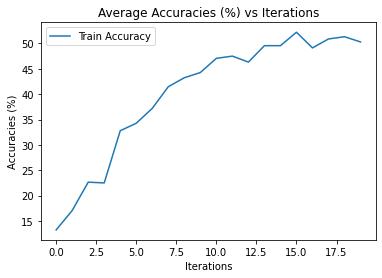

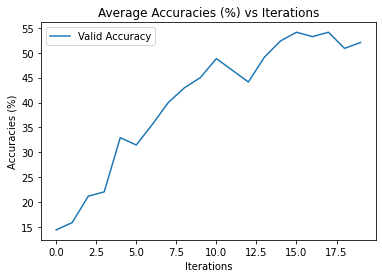

In [496]:
import matplotlib.pyplot as plt

plt.figure()
plt.plot(np.arange(20), [i*100 for i in Taccuracies], label = "Train Accuracy")
plt.xlabel("Iterations")
plt.ylabel("Accuracies (%)")
plt.legend(loc="best")
plt.title("Average Accuracies (%) vs Iterations")
plt.show()

plt.figure()
plt.plot(np.arange(20), [i*100 for i in Vaccuracies], label = "Valid Accuracy")
plt.xlabel("Iterations")
plt.ylabel("Accuracies (%)")
plt.legend(loc="best")
plt.title("Average Accuracies (%) vs Iterations")
plt.show()


In [ ]:
# for epoch in range(20):
#     # Run an epoch over the training data.
#     print('Starting epoch %d / %d' % (epoch + 1, num_epochs))
#     run_model(mymodel, loss_fn, train_loader, optimizer)

#     train_acc = calculate_accuracy(mymodel, train_loader)
#     val_acc = calculate_accuracy(mymodel, val_loader)
#     print('Train accuracy: ', train_acc)
#     print('Val accuracy: ', val_acc)
#     print()